In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [22]:
df=pd.read_csv('./Data_DL/weight-height.csv')
df.info()
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [23]:
X=df.Height.values# input or data 
y_true=df.Weight.values
print (X[:5],y_true[:5], sep='\n\n')


[73.84701702 68.78190405 74.11010539 71.7309784  69.88179586]

[241.89356318 162.31047252 212.74085556 220.0424703  206.34980062]


In [24]:
#line equation
def line(x, w=0, b=0):
    return x * w + b

#for error or cost function square the error and take sqrt
def mean_squared_error(y_true, y_pred):
    s=(y_true - y_pred)**2
    return np.sqrt(s.mean())

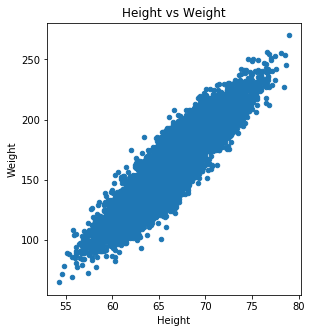

In [25]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)#rows,columns,select columns
df.plot(kind="scatter",
         x="Height",
         y="Weight",
         title="Height vs Weight", ax=ax1)


Text(0.5, 0, 'b')

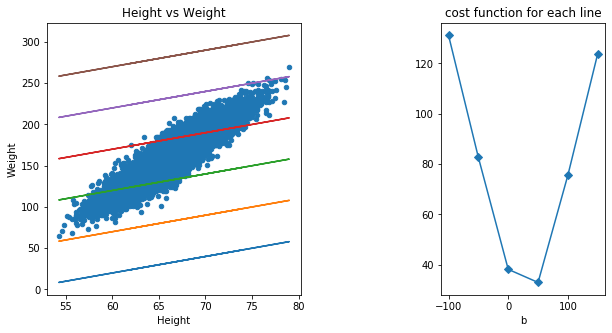

In [26]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)#rows,columns,select columns
df.plot(kind="scatter",
         x="Height",
         y="Weight",
         title="Height vs Weight", ax=ax1)
bs=[-100,-50,0,50,100,150]
mses=[]
for b in bs:
    y_pred=line(X, w=2, b=b)
    mse=mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)
    
# error for each line or cost function
ax2=plt.subplot(133)
plt.plot(bs,mses,'D-')
plt.title('cost function for each line')
plt.xlabel('b')#bias


## we got the value of w and b by NN 

Text(0.5, 0, 'b')

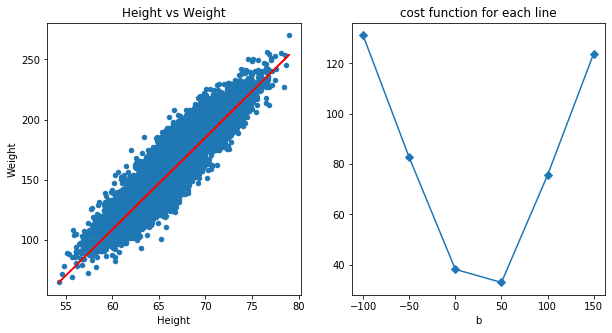

In [54]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)#rows,columns,select columns
df.plot(kind="scatter",
         x="Height",
         y="Weight",
         title="Height vs Weight", ax=ax1)

y_pred=line(X, w=7.653261, b=-350.67557)
plt.plot(X, y_pred ,color='red')
    
#error for each line or cost function
ax2=plt.subplot(122)
plt.plot(bs,mses,'D-')
plt.title('cost function for each line')
plt.xlabel('b')#bias

## find w and b with DL


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#densly each node connected with other
from tensorflow.keras.optimizers import Adam, SGD

In [28]:
import tensorflow
tensorflow.__version__


'2.1.0'

In [29]:
print(X[:5],
     y_pred[:5],sep='\n\n')

[73.84701702 68.78190405 74.11010539 71.7309784  69.88179586]

[297.69403404 287.56380809 298.22021078 293.46195681 289.76359172]


In [30]:
#shape
X.shape

(10000,)

In [51]:
model=Sequential()
model.add(Dense(1,input_shape=(1,)))# one layer and one input

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(Adam(lr=0.8),'mean_squared_error')

In [36]:
model.fit(X,y_true,epochs=30)

Train on 10000 samples
Epoch 1/30
10000/10000 [==============================] - 0s 50us/sample - loss: 171.9785
Epoch 2/30
10000/10000 [==============================] - 1s 53us/sample - loss: 163.5828
Epoch 3/30
10000/10000 [==============================] - 1s 51us/sample - loss: 165.6535
Epoch 4/30
10000/10000 [==============================] - 0s 49us/sample - loss: 168.7140
Epoch 5/30
10000/10000 [==============================] - 0s 49us/sample - loss: 166.6127
Epoch 6/30
10000/10000 [==============================] - 1s 51us/sample - loss: 184.8154
Epoch 7/30
10000/10000 [==============================] - 1s 50us/sample - loss: 176.6181
Epoch 8/30
10000/10000 [==============================] - 1s 52us/sample - loss: 167.2016
Epoch 9/30
10000/10000 [==============================] - 0s 50us/sample - loss: 167.5274
Epoch 10/30
10000/10000 [==============================] - 1s 50us/sample - loss: 170.9116
Epoch 11/30
10000/10000 [==============================] - 1s 51us/sample - 

In [39]:
#feedback function
pred_y=model.predict(X)
pred_y

array([[214.4949 ],
       [175.73032],
       [216.50845],
       ...,
       [138.12286],
       [177.66153],
       [123.3999 ]], dtype=float32)

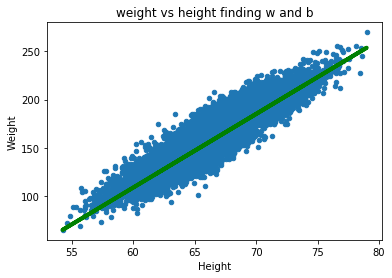

In [44]:
#for graphical representation
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='weight vs height finding w and b')
plt.plot(X,pred_y,color='green',linewidth=4)

In [45]:
w ,b=model.get_weights()
print(w,b)#these values are best and suitable values to train a model

[[7.653261]] [-350.67557]
